# Library Importing

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comment out the following line if you are using Jupyter Notebook
# %matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

In [2]:
# Import Faker
from faker import Faker
fake = Faker()

In [3]:
# To ensure the results are reproducible
Faker.seed(4321)
names_list = []


In [4]:
fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [5]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


### Boxplot Generation

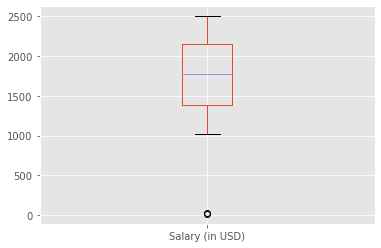

In [6]:
# Generate a Boxplot
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

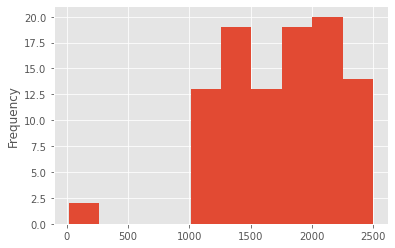

In [7]:
# Generate a Histogram plot
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

In [8]:
# Minimum and maximum salaries
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


## Clustering based approach for anomaly detection

#### If there are n points on a two-dimensional space(refer the following figure) and their coordinates are denoted by(x_i, y_i), then the Euclidean distance between any two points((x1, y1) and(x2, y2)) on this space is

In [9]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [10]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans
    
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)

In the above chunk of code, we fed the salary data points the kmeans(). We also specified the number of clusters to which we want to group the data points. centroids are the centroids generated by kmeans() and avg_distance is the averaged Euclidean distance between the data points fed and the centroids generated by kmeans().Let's assign the groups of the data points by calling the vq() method. It takes -

The data points
The centroid as generated by the clustering algorithm (kmeans() in our case)
It then returns the groups (clusters) of the data points and the distances between the data points and its nearest groups.

In [20]:
#import sklearn
#from sklearn import cluster, datasets
from scipy.cluster.vq import vq, kmeans, whiten

In [23]:
# Get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(salary_raw, centroids)

NameError: name 'cluster' is not defined

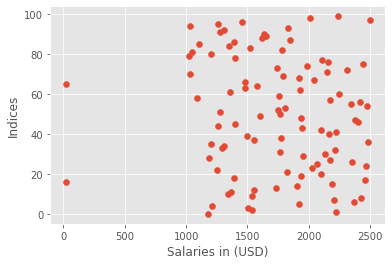

In [24]:
plt.scatter(salary_raw, np.arange(0,100))#plt.scatter(salary_raw,np.arange(0,100))
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

## Anomaly detection as a classification problem

In [25]:
# First assign all the instances to 
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# Veirfy 
print(salary_df.loc[16])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object


In [26]:
salary_df.head()

,Person,Salary (in USD),class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0


We are going to use the k-NN classification method for this. Also, we are going to use a Python library called PyOD which is specifically developed for anomaly detection purposes.

In [27]:
# Importing KNN module from PyOD
from pyod.models.knn import KNN

In [28]:
# Segregate the salary values and the class labels 
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values

# Train kNN detector
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

## Let's discuss the two parameters we passed into KNN() -

**contamination** - the amount of anomalies in the data (in percentage) which for our case is 2/100 = 0.02

**n_neighbors** - number of neighbors to consider for measuring the proximity

In [35]:
# Get the prediction labels of the training data
y_train_pred = clf.labels_ 
print(y_train_pred)
    
# Outlier scores
y_train_scores = clf.decision_scores_
print(y_train_scores)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  68.   28.   35.   33.   39.   21.   43.   30.   46.   33.   36.   27.
   30.   34.   36.   28. 1024.   34.   35.   17.   48.   39.   39.   66.
   30.   39.   49.   29.   67.   26.   37.   21.   26.   30.   36.   49.
   47.   29.   15.   38.   25.   28.   51.   21.   33.   44.   41.   42.
   17.   50.   20.   29.   19.   31.   33.   57.   42.   28.   71.   18.
   39.   37.   13.   43.   43. 1030.   43.   54.   19.   24.   74.   29.
   63.   23.   49.   33.   22.   40.   46.   86.   47.   60.   21.   30.
   40.   74.   37.   60.   68.   76.   82.   26.   36.   43.   72.   30.
   54.   59.   61.   30.]


Let's now try to evaluate **KNN()** with respect to the training data. **PyOD** provides a handy function for this - evaluate_print().

In [30]:
# Import the utility function for model evaluation
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0


We see that the KNN() model was able to perform exceptionally good on the training data. It provides three metrics and their scores -
**ROC**
Precision along with a confidence rank

**Note: While detecting anomalies, we almost always consider ROC and Precision as it gives a much better idea about the model's performance. We have also seen its significance in the earlier sections.**

In [47]:
from IPython.display import Image, display, SVG
#from keras.utils.visualize_util import model_to_dot

# kNN detector
clf_name="KNN"
#visualize(clf_name, X, y, show_figure=True, save_figure=False)

In [48]:
# A salary of $37 (an anomaly right?)
X_test = np.array([[37.]])

Let's now test how if the model could detect this **salary value as an anomaly or not.**

In [32]:
# Check what the model predicts on the given test data point
clf.predict(X_test)

array([1])

In [33]:
# A salary of $1256
X_test_abnormal = np.array([[1256.]])

# Predict
clf.predict(X_test_abnormal)

array([0])

In [34]:
from pyod.utils.data import evaluate_print